<a href="https://colab.research.google.com/github/Lu-David/frowning-bias/blob/main/RafDB_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Background

Pre trained Resnet-50 model downloaded from here: https://github.com/ox-vgg/vgg_face2/blob/master/README.md.

Download and upload the vgg zip file if you want to train it

Relevant Data Files \
- https://www.ugrad.cs.jhu.edu/~dlu17/README.txt
- https://www.ugrad.cs.jhu.edu/~dlu17/list_patition_label.txt
- https://www.ugrad.cs.jhu.edu/~dlu17/aligned_train.zip
- https://www.ugrad.cs.jhu.edu/~dlu17/aligned_test.zip
- https://www.ugrad.cs.jhu.edu/~dlu17/original.zip

In [1]:
!wget https://www.ugrad.cs.jhu.edu/~dlu17/list_patition_label.txt

--2022-11-26 21:37:42--  https://www.ugrad.cs.jhu.edu/~dlu17/list_patition_label.txt
Resolving www.ugrad.cs.jhu.edu (www.ugrad.cs.jhu.edu)... 128.220.13.180
Connecting to www.ugrad.cs.jhu.edu (www.ugrad.cs.jhu.edu)|128.220.13.180|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 285305 (279K) [text/plain]
Saving to: ‘list_patition_label.txt’

list_patition_label 100%[===================>] 278.62K  --.-KB/s    in 0.1s    

2022-11-26 21:37:42 (2.41 MB/s) - ‘list_patition_label.txt’ saved [285305/285305]



In [2]:
!wget https://www.ugrad.cs.jhu.edu/~dlu17/aligned_train.zip

--2022-11-26 21:37:42--  https://www.ugrad.cs.jhu.edu/~dlu17/aligned_train.zip
Resolving www.ugrad.cs.jhu.edu (www.ugrad.cs.jhu.edu)... 128.220.13.180
Connecting to www.ugrad.cs.jhu.edu (www.ugrad.cs.jhu.edu)|128.220.13.180|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32037910 (31M) [application/zip]
Saving to: ‘aligned_train.zip’

aligned_train.zip   100%[===================>]  30.55M  48.6MB/s    in 0.6s    

2022-11-26 21:37:43 (48.6 MB/s) - ‘aligned_train.zip’ saved [32037910/32037910]



In [3]:
!unzip /content/aligned_train.zip

Streaming output truncated to the last 5000 lines.
  inflating: aligned_train/aligned_train/train_06823_aligned.jpg  
  inflating: aligned_train/aligned_train/train_11005_aligned.jpg  
  inflating: aligned_train/aligned_train/train_01104_aligned.jpg  
  inflating: aligned_train/aligned_train/train_03735_aligned.jpg  
  inflating: aligned_train/aligned_train/train_09901_aligned.jpg  
  inflating: aligned_train/aligned_train/train_06885_aligned.jpg  
  inflating: aligned_train/aligned_train/train_00353_aligned.jpg  
  inflating: aligned_train/aligned_train/train_10252_aligned.jpg  
  inflating: aligned_train/aligned_train/train_07800_aligned.jpg  
  inflating: aligned_train/aligned_train/train_08984_aligned.jpg  
  inflating: aligned_train/aligned_train/train_10148_aligned.jpg  
  inflating: aligned_train/aligned_train/train_00049_aligned.jpg  
  inflating: aligned_train/aligned_train/train_03541_aligned.jpg  
  inflating: aligned_train/aligned_train/train_10026_aligned.jpg  
  inflating

In [4]:
!wget https://www.ugrad.cs.jhu.edu/~dlu17/aligned_test.zip

--2022-11-26 21:37:45--  https://www.ugrad.cs.jhu.edu/~dlu17/aligned_test.zip
Resolving www.ugrad.cs.jhu.edu (www.ugrad.cs.jhu.edu)... 128.220.13.180
Connecting to www.ugrad.cs.jhu.edu (www.ugrad.cs.jhu.edu)|128.220.13.180|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7977690 (7.6M) [application/zip]
Saving to: ‘aligned_test.zip’

aligned_test.zip    100%[===================>]   7.61M  26.1MB/s    in 0.3s    

2022-11-26 21:37:45 (26.1 MB/s) - ‘aligned_test.zip’ saved [7977690/7977690]



In [5]:
!unzip /content/aligned_test.zip

Archive:  /content/aligned_test.zip
   creating: aligned_test/
   creating: aligned_test/aligned_test/
  inflating: aligned_test/aligned_test/test_1927_aligned.jpg  
  inflating: aligned_test/aligned_test/test_1849_aligned.jpg  
  inflating: aligned_test/aligned_test/test_0747_aligned.jpg  
  inflating: aligned_test/aligned_test/test_0629_aligned.jpg  
  inflating: aligned_test/aligned_test/test_0533_aligned.jpg  
  inflating: aligned_test/aligned_test/test_1030_aligned.jpg  
  inflating: aligned_test/aligned_test/test_2538_aligned.jpg  
  inflating: aligned_test/aligned_test/test_2456_aligned.jpg  
  inflating: aligned_test/aligned_test/test_1244_aligned.jpg  
  inflating: aligned_test/aligned_test/test_2622_aligned.jpg  
  inflating: aligned_test/aligned_test/test_1846_aligned.jpg  
  inflating: aligned_test/aligned_test/test_1928_aligned.jpg  
  inflating: aligned_test/aligned_test/test_0626_aligned.jpg  
  inflating: aligned_test/aligned_test/test_0748_aligned.jpg  
  inflating: al

# Data Preprocessing

## Input

Gender
	0: male		1: female	2: unsure
  
	Race	
0: Caucasian		1: African-American		2: Asian

	Age (5 ranges)	
0: 0-3	 1: 4-19		2: 20-39		3: 40-69		4: 70+


## Label and Annotations

Emotion
1: Surprise
2: Fear
3: Disgust
4: Happiness
5: Sadness
6: Anger
7: Neutral

In [6]:
emo_lookup = {
    1 : "suprise",
    2 : "fear",
    3 : "disgust",
    4 : "happiness",
    5 : "sadness",
    6 : "anger",
    7 : "neutral"
}

In [7]:
import os 

# make directories to assign labels to images
for i in range(1,8):
  os.mkdir(f"/content/aligned_train/{i}")

In [8]:
# make directories to assign labels to images
for i in range(1,8):
  os.mkdir(f"/content/aligned_test/{i}")

In [9]:
# assign emotion label to file name (both original and aligned)
label_lookup = {}

with open("/content/list_patition_label.txt", "r") as f:
  data = f.read()
  for line in data.split("\n"):
    try:
      filename, emo_label = line.split(" ")
      label_lookup[filename] = int(emo_label)
      _filename, ext = filename.split(".")
      label_lookup[_filename + "_aligned." + ext] = int(emo_label)
    except:
      # idc
      pass

In [10]:
path = f"/content/aligned_train"
for f in os.listdir(path + "/aligned_train"):
  os.rename(f"{path}/aligned_train/{f}", f"{path}/{label_lookup[f]}/{f}")

In [11]:
path = f"/content/aligned_test"
for f in os.listdir(path + "/aligned_test"):
  os.rename(f"{path}/aligned_test/{f}", f"{path}/{label_lookup[f]}/{f}")

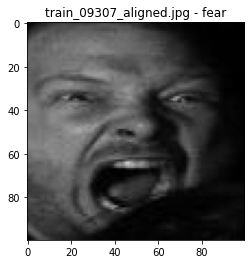

In [12]:
import os 
import matplotlib.pyplot as plt  
from matplotlib import image
import numpy as np

# randomly sample an image
image_folder_path = f"/content/aligned_train/{np.random.randint(1, 8)}"

image_names = os.listdir(image_folder_path)
sample_image_name = image_names[0]
sample_image = image.imread(os.path.join(image_folder_path, sample_image_name))

plt.title(f"{sample_image_name} - {emo_lookup[label_lookup[sample_image_name]]}")
plt.imshow(sample_image)

In [13]:
os.rmdir("/content/aligned_train/aligned_train")
os.rmdir("/content/aligned_test/aligned_test")

In [15]:
import tensorflow as tf 
from keras.utils.np_utils import to_categorical
import numpy as np 

directory = "/content/aligned_train"

# IMPORTANT: Make sure order of labels matches images in original or aligned folder

train_X = tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="categorical",
    class_names= ('1', '2', '3', '4', '5', '6', '7'),
    color_mode="rgb",
    batch_size=256,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="nearest",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 12271 files belonging to 7 classes.


happiness


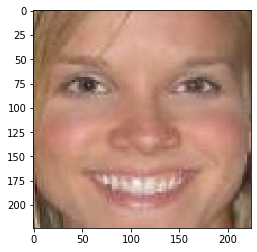

In [16]:
for x_batch, y_batch in train_X:
  plt.imshow(x_batch[0])
  print(emo_lookup[np.argmax(y_batch[0]) +1])
  break

In [17]:
import tensorflow as tf 

directory = "/content/aligned_test"

test_X = tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="categorical",
    class_names=('1', '2','3', '4', '5', '6', '7'),
    color_mode="rgb",
    batch_size=256,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="nearest",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3068 files belonging to 7 classes.


# Train Model

In [18]:
!unzip /content/vggface2_Keras.zip

Archive:  /content/vggface2_Keras.zip
   creating: vggface2_Keras/
  inflating: vggface2_Keras/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/vggface2_Keras/
  inflating: __MACOSX/vggface2_Keras/._.DS_Store  
   creating: vggface2_Keras/meta/
  inflating: vggface2_Keras/meta/.DS_Store  
   creating: __MACOSX/vggface2_Keras/meta/
  inflating: __MACOSX/vggface2_Keras/meta/._.DS_Store  
  inflating: vggface2_Keras/meta/ijbb_template_pair_label.txt  
  inflating: vggface2_Keras/meta/ijbb_face_tid_mid.txt  
  inflating: vggface2_Keras/README.md  
   creating: vggface2_Keras/model/
  inflating: vggface2_Keras/model/.DS_Store  
   creating: __MACOSX/vggface2_Keras/model/
  inflating: __MACOSX/vggface2_Keras/model/._.DS_Store  
   creating: vggface2_Keras/model/resnet50_softmax_dim512/
  inflating: vggface2_Keras/model/resnet50_softmax_dim512/weights.h5  
   creating: __MACOSX/vggface2_Keras/model/resnet50_softmax_dim512/
  inflating: __MACOSX/vggface2_Keras/model/resnet50_softmax_di

In [19]:
from tensorflow import keras
from keras.layers import Dense,Reshape, Input, Concatenate
import tensorflow as tf 
tf.config.run_functions_eagerly(True)


model = keras.models.load_model('/content/vggface2_Keras/model/resnet50_softmax_dim512/weights.h5')
model.trainable = False

tail = Dense(7, activation='softmax')(model.layers[-1].output)

model = tf.keras.Model(
            inputs=model.inputs,
            outputs=[tail])

In [20]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 base_input (InputLayer)        [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1/7x7_s2 (Conv2D)          (None, 112, 112, 64  9408        ['base_input[0][0]']             
                                )                                                                 
                                                                                                  
 conv1/7x7_s2/bn (BatchNormaliz  (None, 112, 112, 64  256        ['conv1/7x7_s2[0][0]']           
 ation)                         )                                                             

In [21]:
scheduler = tf.keras.optimizers.schedules.ExponentialDecay(
    0.0005, 200, 0.9, staircase=False, name=None
)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=scheduler),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=None,
    loss_weights=None,
    weighted_metrics=None,
    run_eagerly=None,
    steps_per_execution=1,
    jit_compile=None,
)

In [ ]:
history = model.fit(train_X, epochs=60)

Epoch 1/60
30/48 [=================>............] - ETA: 7s - loss: 2.2191

In [185]:
for x_batch, y_batch in train_X:
  res = model.test_on_batch(x_batch, y_batch, return_dict = True)
  print(res)

{'loss': 1.6321971416473389}
{'loss': 1.6873500347137451}
{'loss': 1.6525375843048096}
{'loss': 1.6665966510772705}
{'loss': 1.6677484512329102}
{'loss': 1.6766078472137451}
{'loss': 1.7146883010864258}
{'loss': 1.675278902053833}
{'loss': 1.7727746963500977}
{'loss': 1.6766133308410645}
{'loss': 1.6614842414855957}
{'loss': 1.6509208679199219}
{'loss': 1.7337355613708496}
{'loss': 1.6521697044372559}
{'loss': 1.7346677780151367}
{'loss': 1.701728343963623}
{'loss': 1.737720251083374}
{'loss': 1.7089524269104004}
{'loss': 1.6597113609313965}
{'loss': 1.7681388854980469}
{'loss': 1.7133994102478027}
{'loss': 1.6789071559906006}
{'loss': 1.6727204322814941}
{'loss': 1.694969892501831}
{'loss': 1.7511827945709229}
{'loss': 1.6616170406341553}
{'loss': 1.7195661067962646}
{'loss': 1.6654510498046875}
{'loss': 1.7158522605895996}
{'loss': 1.641075849533081}
{'loss': 1.738610029220581}
{'loss': 1.7442364692687988}
{'loss': 1.691227912902832}
{'loss': 1.6889653205871582}
{'loss': 1.6973233222

In [181]:
np.argmax(predictions, axis = 1)

array([6, 3, 3, ..., 3, 3, 3])

In [205]:
predictions = model.predict(test_X)

12/12 [==============================] - 2s 135ms/step


In [206]:
y_pred = np.argmax(predictions, axis = 1)

In [207]:
y_pred_names = [emo_lookup[i + 1] for i in y_pred]
y_pred_names

['happiness',
 'happiness',
 'happiness',
 'happiness',
 'happiness',
 'happiness',
 'happiness',
 'happiness',
 'neutral',
 'happiness',
 'happiness',
 'happiness',
 'happiness',
 'happiness',
 'sadness',
 'happiness',
 'happiness',
 'happiness',
 'happiness',
 'happiness',
 'happiness',
 'happiness',
 'happiness',
 'happiness',
 'neutral',
 'happiness',
 'happiness',
 'happiness',
 'happiness',
 'happiness',
 'happiness',
 'happiness',
 'happiness',
 'happiness',
 'happiness',
 'neutral',
 'happiness',
 'happiness',
 'happiness',
 'happiness',
 'happiness',
 'happiness',
 'happiness',
 'happiness',
 'happiness',
 'neutral',
 'happiness',
 'happiness',
 'happiness',
 'happiness',
 'happiness',
 'happiness',
 'happiness',
 'happiness',
 'happiness',
 'happiness',
 'happiness',
 'happiness',
 'happiness',
 'happiness',
 'happiness',
 'happiness',
 'happiness',
 'happiness',
 'happiness',
 'happiness',
 'happiness',
 'happiness',
 'happiness',
 'happiness',
 'happiness',
 'happiness',
 '

8/8 [==============================] - 1s 67ms/step
tf.Tensor([0. 0. 0. 0. 0. 0. 1.], shape=(7,), dtype=float32) [0.09951334 0.0223835  0.06910129 0.43216786 0.13462746 0.03884975
 0.20335676]


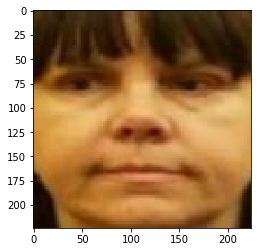

In [223]:
for x_batch, y_batch in test_X:
  predictions = model.predict(x_batch)
  plt.imshow(x_batch[0])
  print(y_batch[0], predictions[0])
  break